<a href="https://colab.research.google.com/github/Navyasri28/Python-practices/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer churn**

-- Customer churn is the rate at which customers leave a company.

-- Causes include switching to competitors, canceling subscriptions due to poor service, or insufficient engagement.

-- Customer churn analysis helps in retaining profitable customers, particularly in the telecom industry.

## **Load the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("customer churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

## **Study the data**

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Get summary statistics of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Null values**

In [ ]:
# Identifying null values

print(df.isnull())

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

In [ ]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Display rows with missing TotalCharges values
missing_total_charges = df[df['TotalCharges'].isnull()]
print(missing_total_charges)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df['TotalCharges'].isnull().sum())

0


## **Outliers**

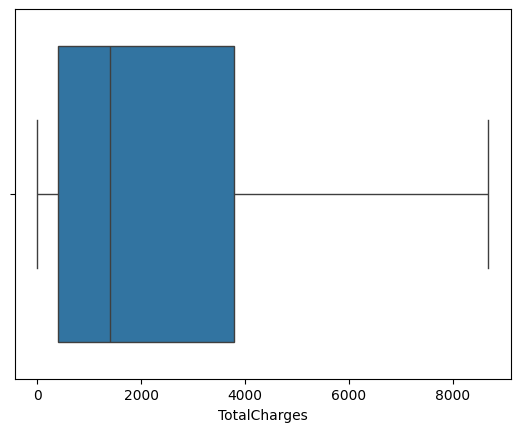

In [ ]:
sns.boxplot(x=df['TotalCharges'])
plt.show()

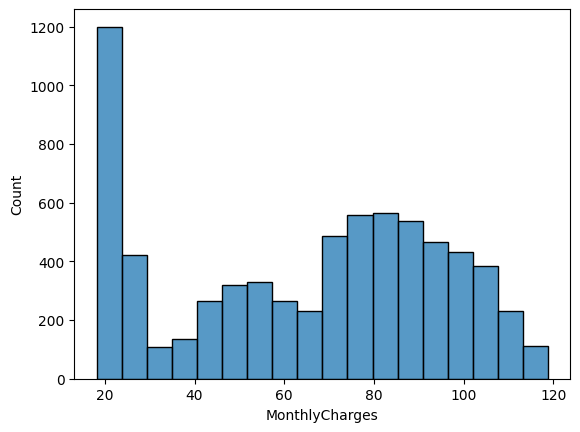

In [ ]:
sns.histplot(df['MonthlyCharges'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

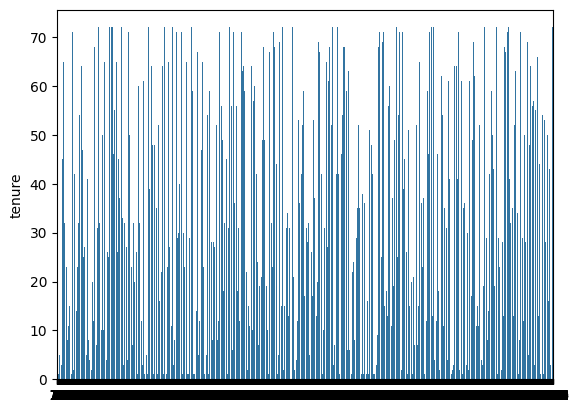

In [ ]:
sns.barplot(df['tenure'])
plt.show

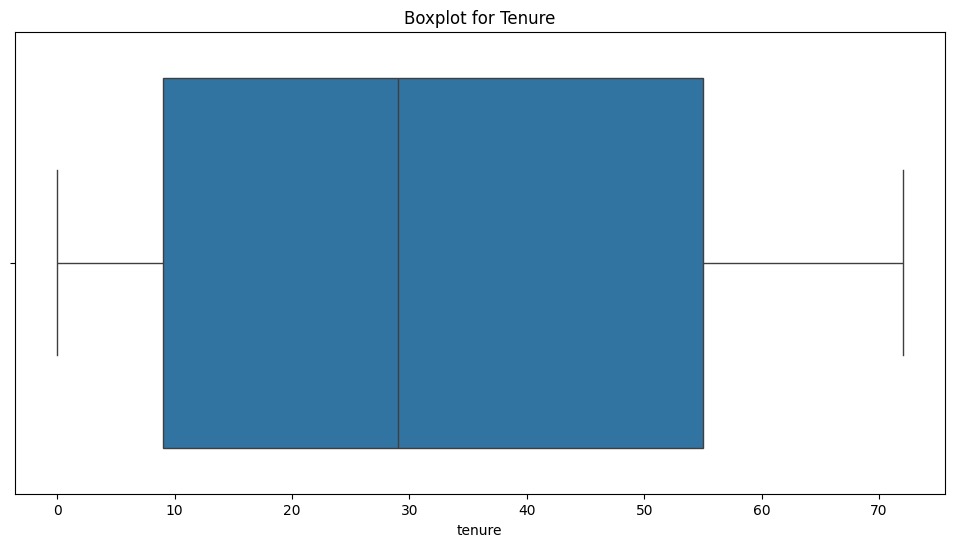

In [ ]:
# Plot boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['tenure'])
plt.title('Boxplot for Tenure')
plt.show()

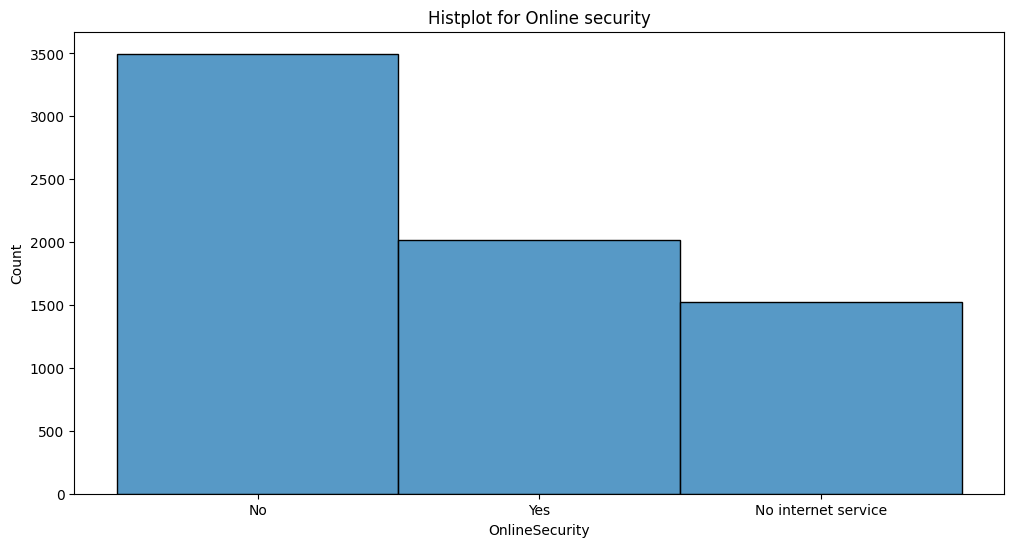

In [ ]:
# Plot boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(x=df['OnlineSecurity'])
plt.title('Histplot for Online security')
plt.show()

# **Analysis**

## **Univar analysis**

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


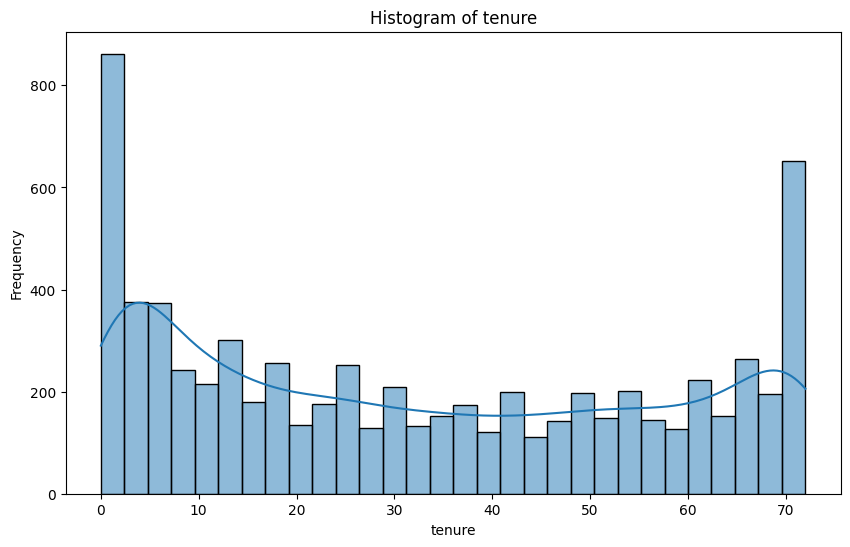

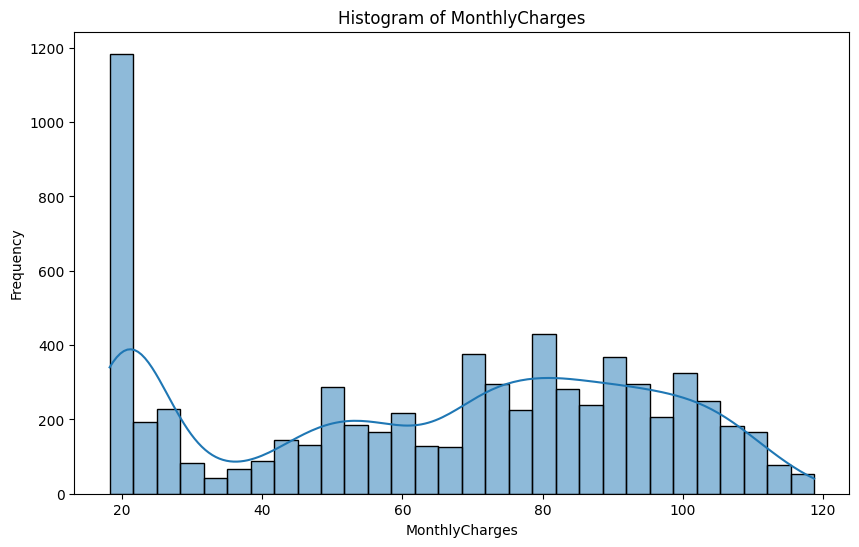

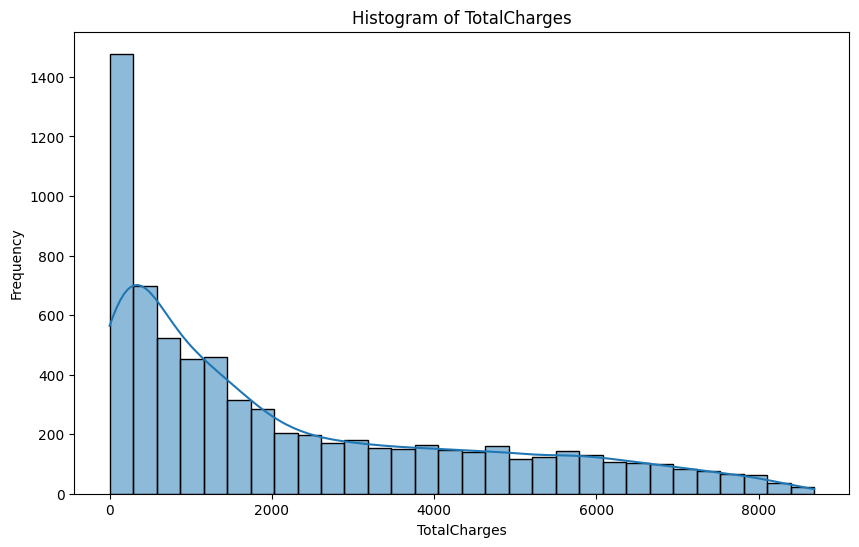

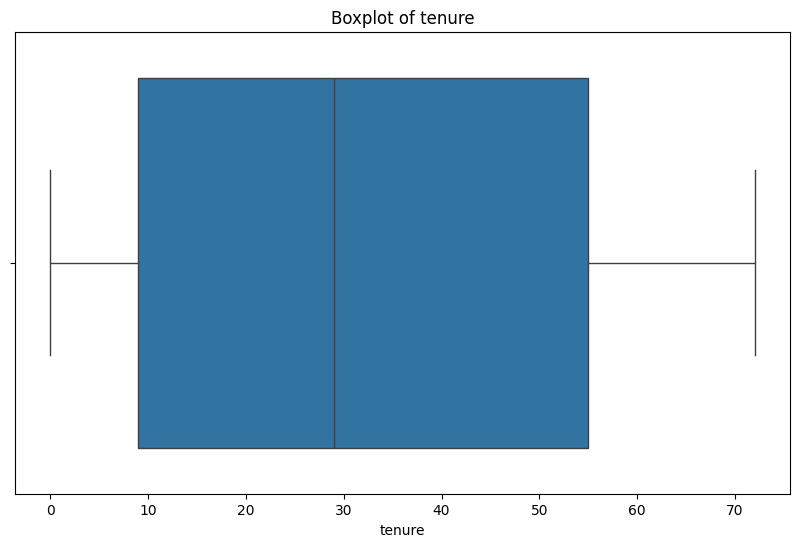

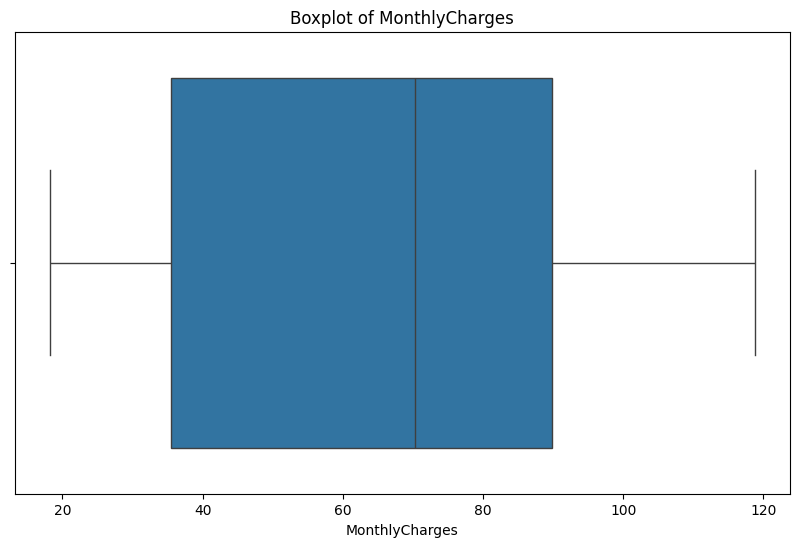

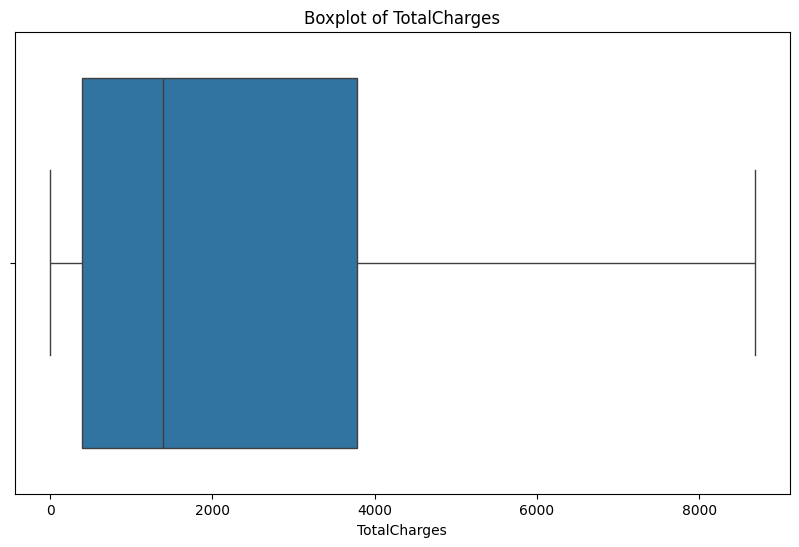

Frequency distribution of gender:
 gender
Male      3555
Female    3488
Name: count, dtype: int64


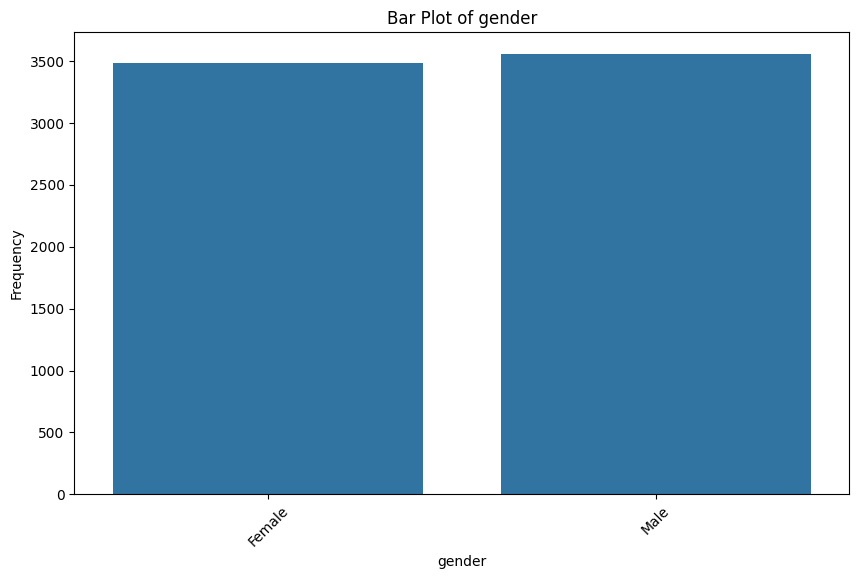

Frequency distribution of SeniorCitizen:
 SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


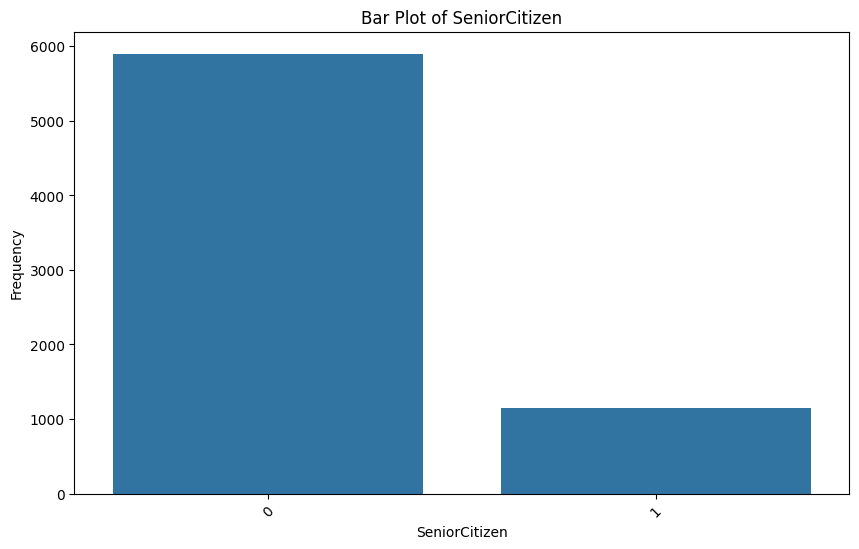

Frequency distribution of Partner:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64


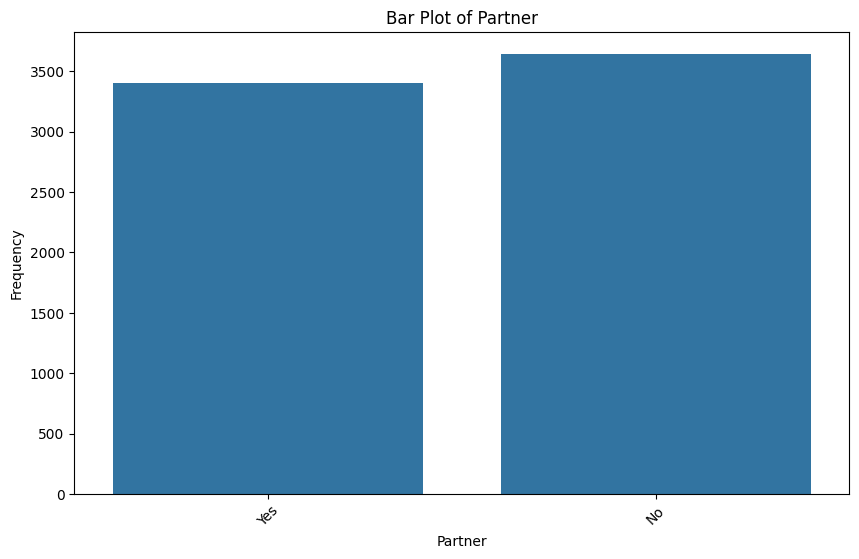

Frequency distribution of Dependents:
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64


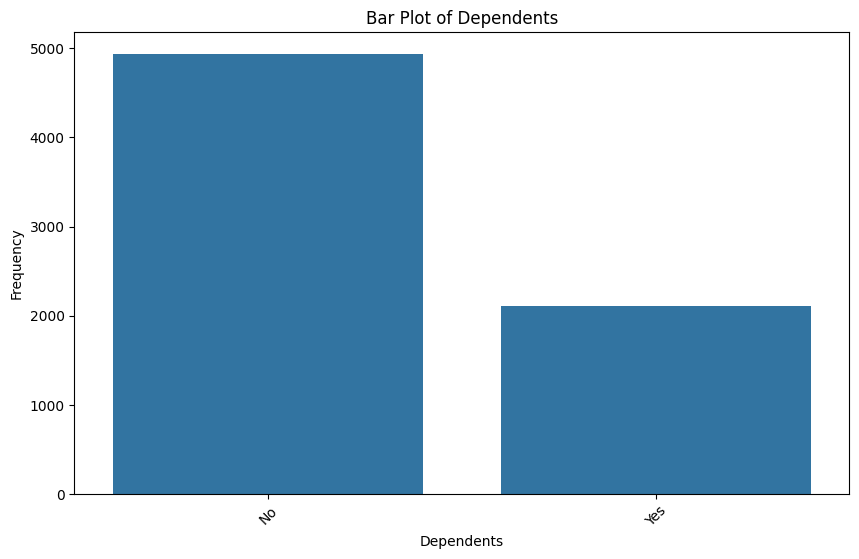

Frequency distribution of PhoneService:
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64


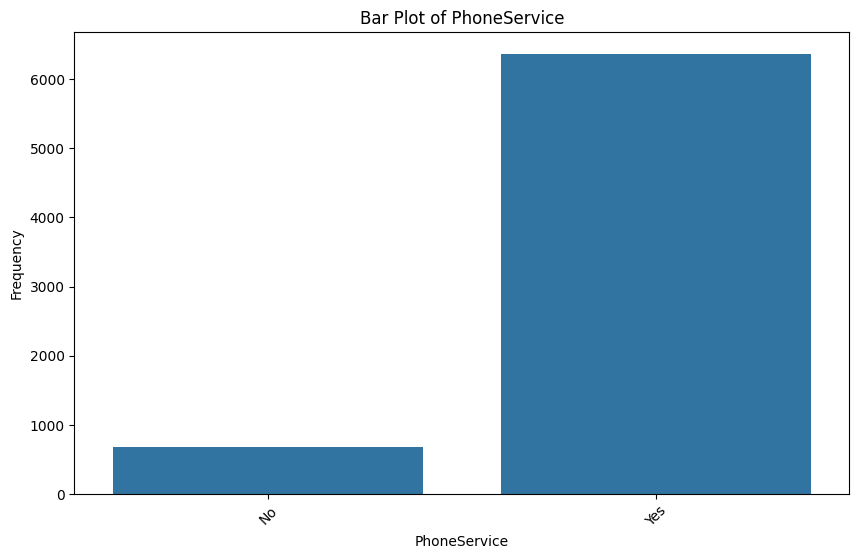

Frequency distribution of MultipleLines:
 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


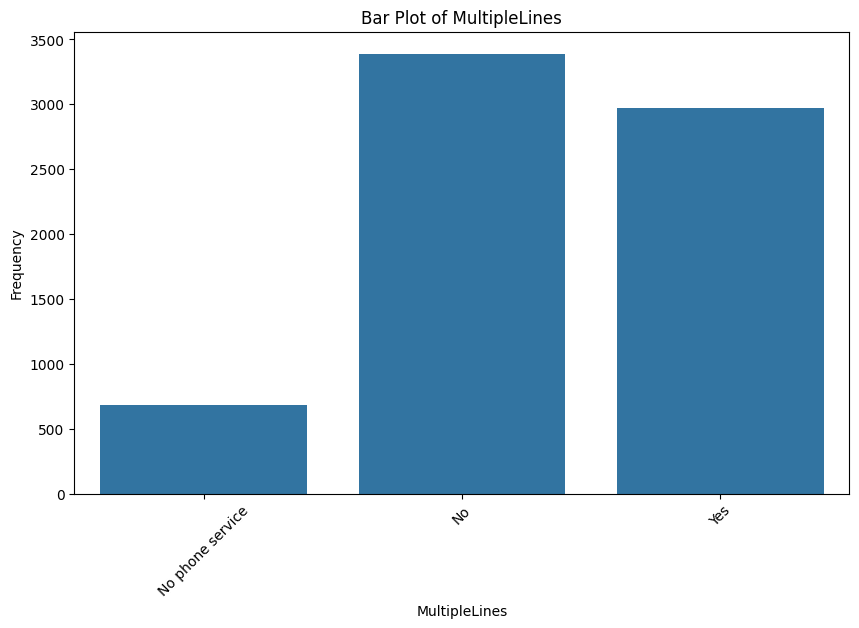

Frequency distribution of InternetService:
 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


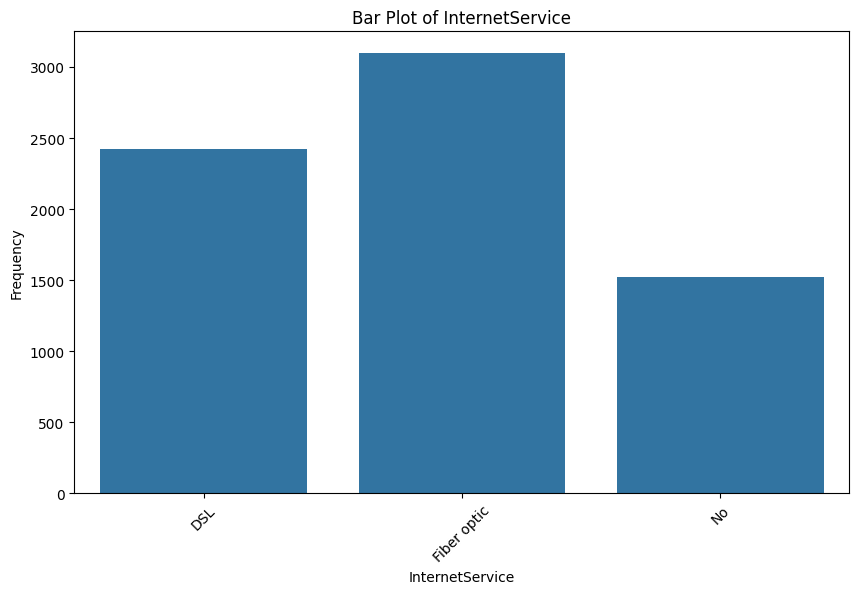

Frequency distribution of OnlineSecurity:
 OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


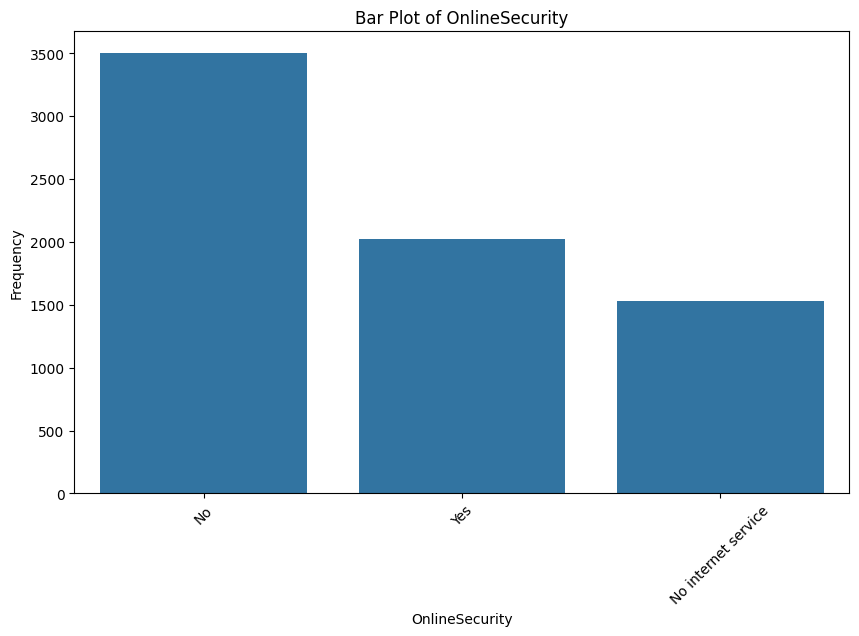

Frequency distribution of OnlineBackup:
 OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


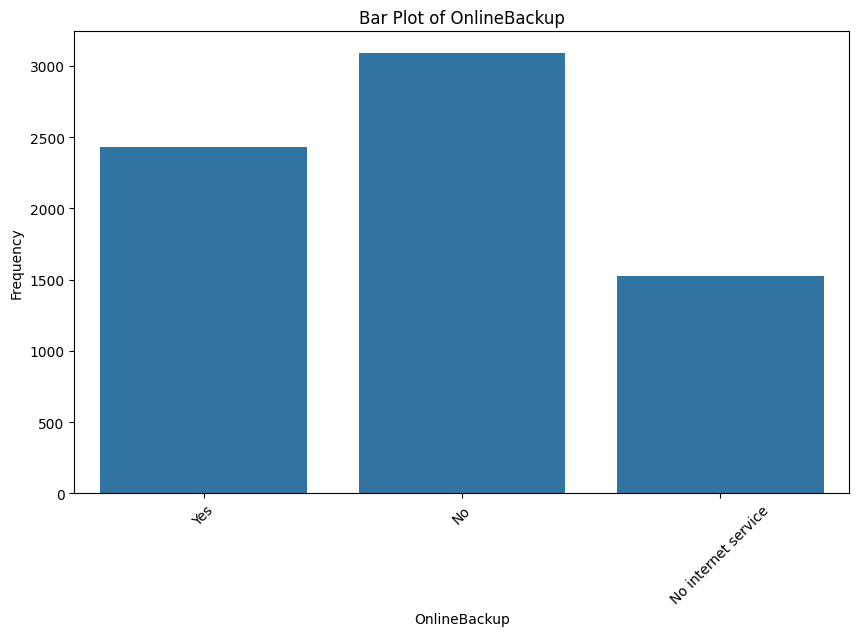

Frequency distribution of DeviceProtection:
 DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


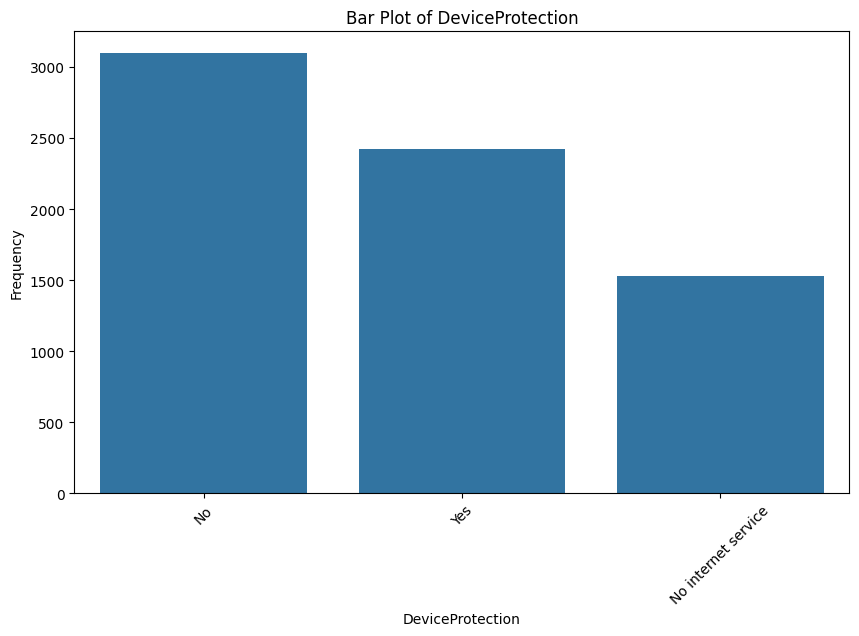

Frequency distribution of TechSupport:
 TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


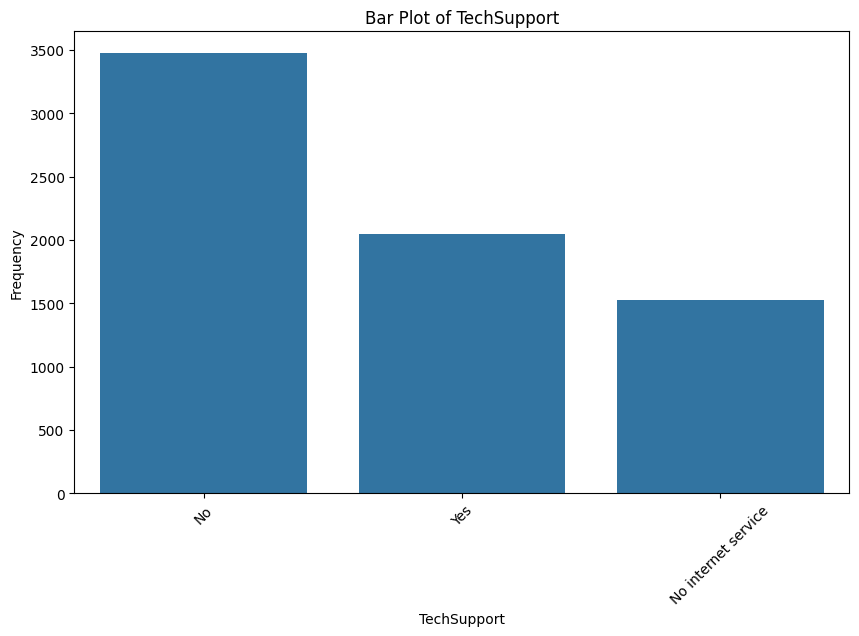

Frequency distribution of StreamingTV:
 StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


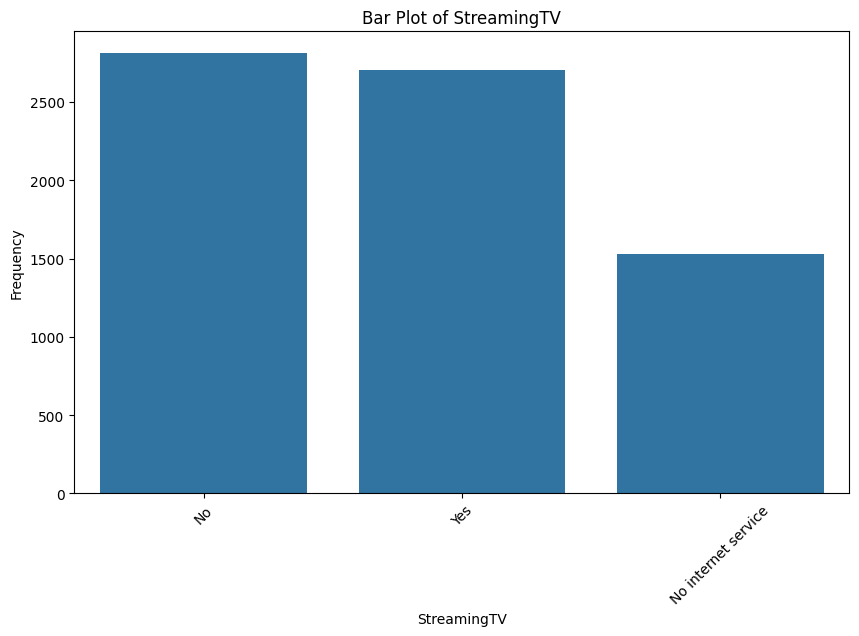

Frequency distribution of StreamingMovies:
 StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


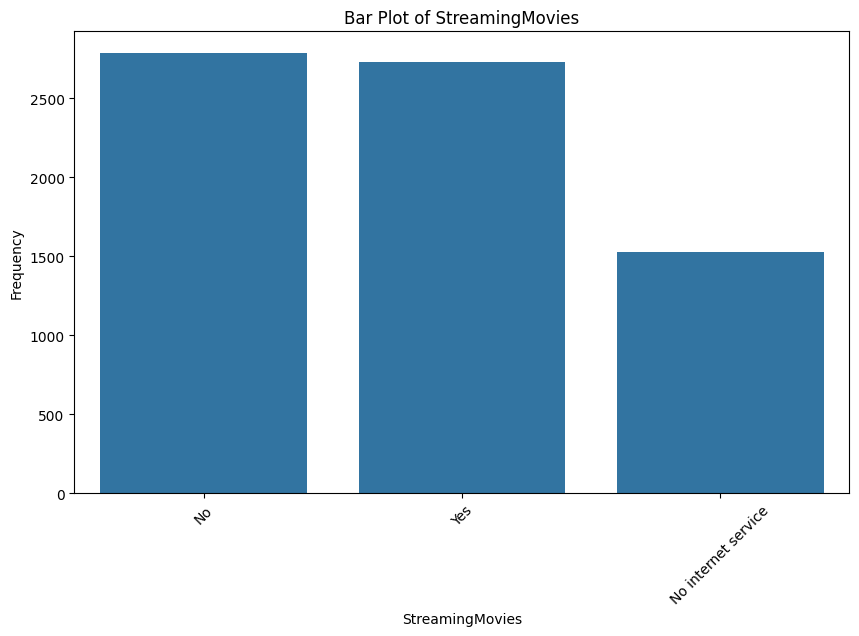

Frequency distribution of Contract:
 Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


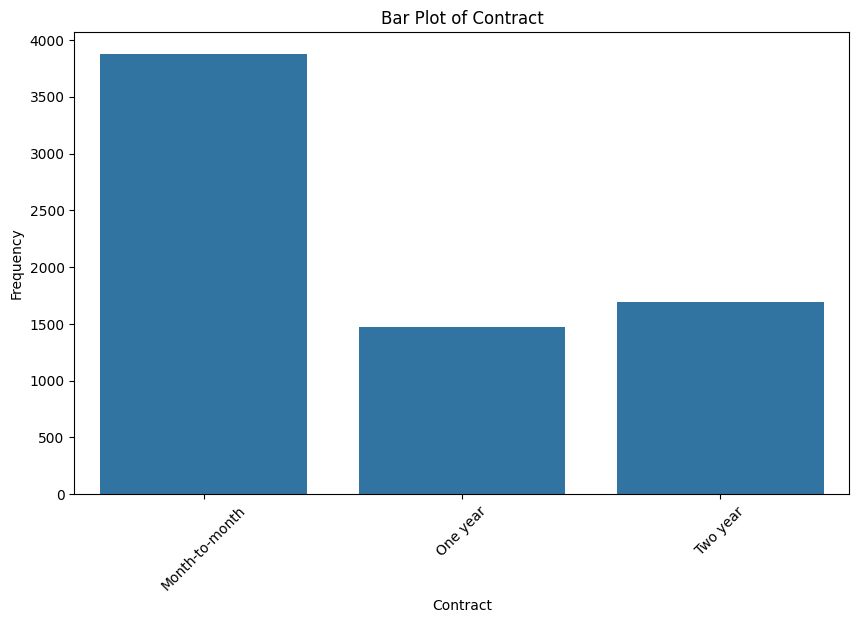

Frequency distribution of PaperlessBilling:
 PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


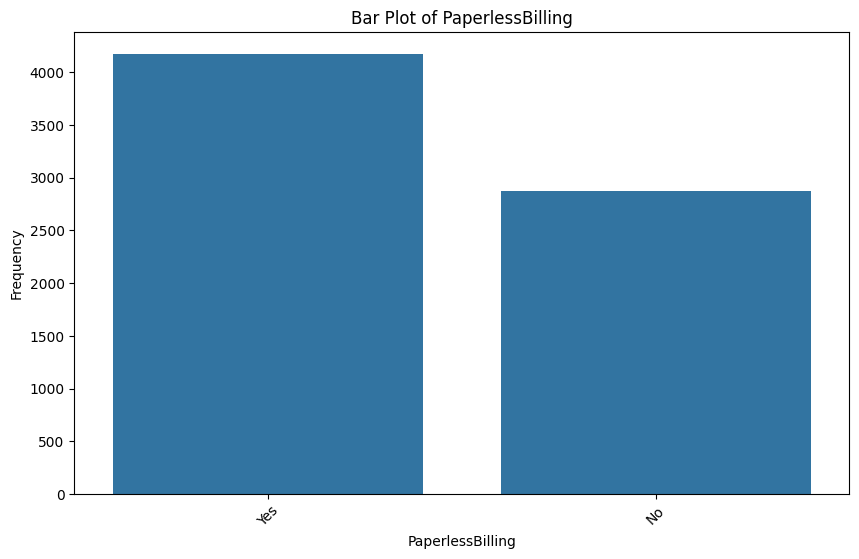

Frequency distribution of PaymentMethod:
 PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


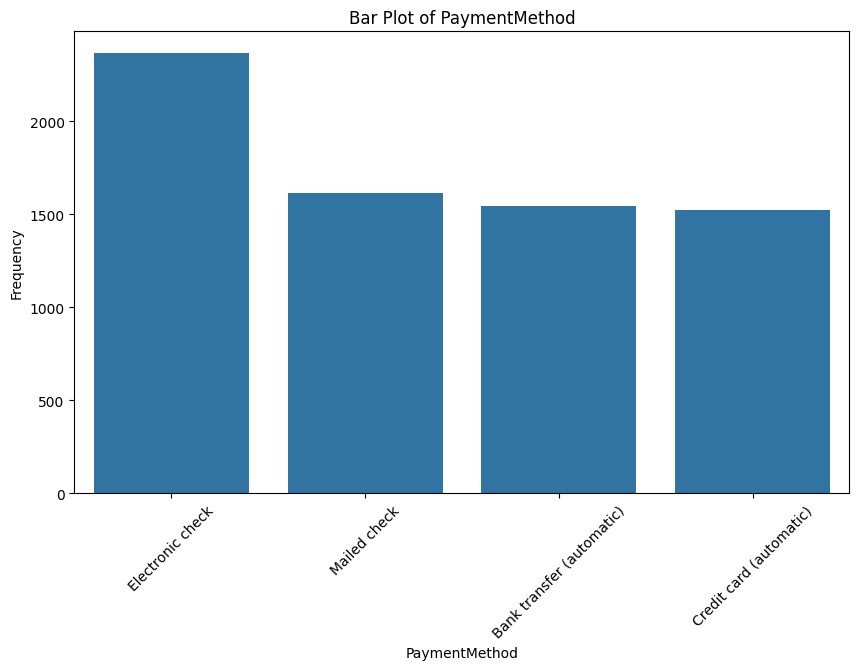

Frequency distribution of Churn:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


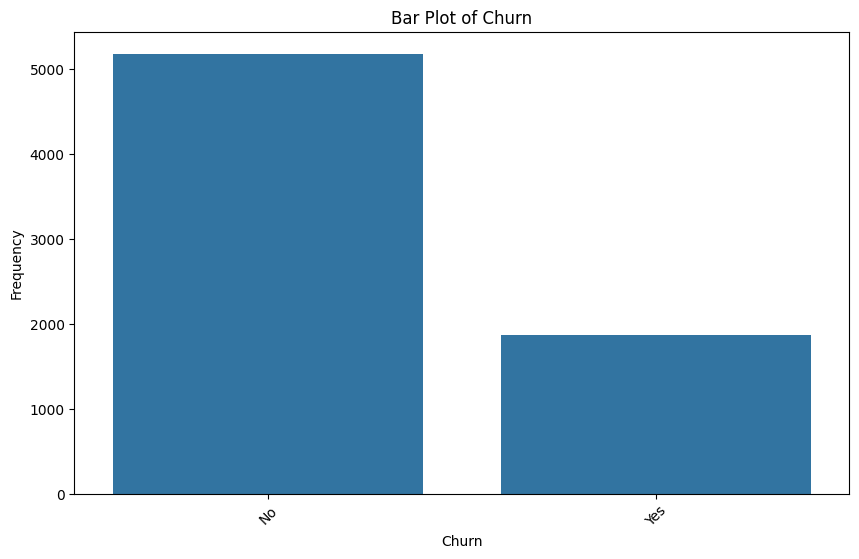

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Summary statistics for numerical columns
summary_statistics = df[numerical_columns].describe()
print(summary_statistics)

# Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Frequency distribution and bar plots for categorical columns
for col in categorical_columns:
    frequency_distribution = df[col].value_counts()
    print(f'Frequency distribution of {col}:\n', frequency_distribution)

    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

## **Bivar analysis**

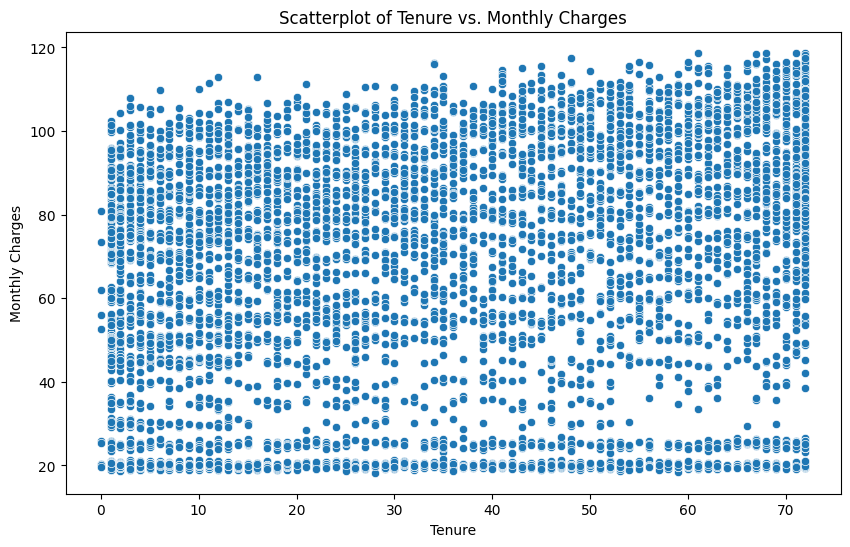

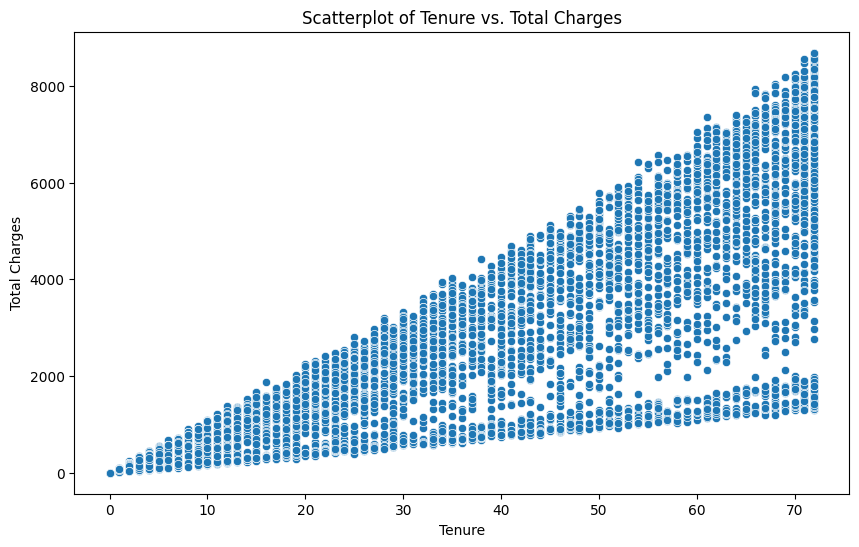

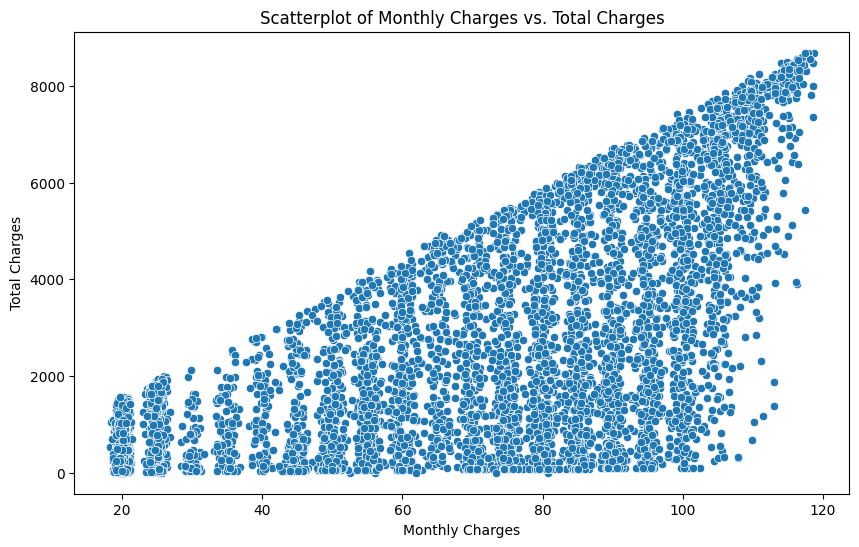

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of Tenure vs. Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)
plt.title('Scatterplot of Tenure vs. Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# Scatterplot of Tenure vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', data=df)
plt.title('Scatterplot of Tenure vs. Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

# Scatterplot of Monthly Charges vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Scatterplot of Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()
